<a href="https://colab.research.google.com/github/Lakshay011235/Lakshay011235/blob/main/MOdel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Network Created:	 (2, 4, 1, 1)
Runtime: 	 0.004331111907958984


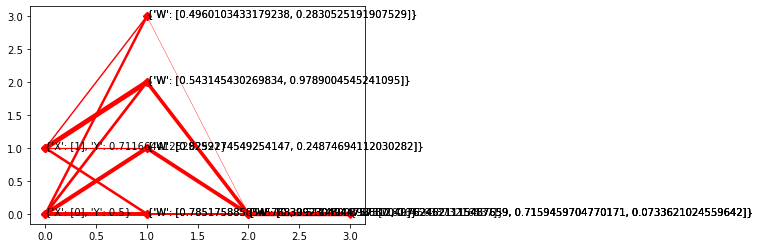

In [14]:
import imp

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import imageio

import time
curr = time.time()


plt.figure()




def f(w,b,x):
    return 1.0 / (1.0 + np.exp(-(w*x + b)))

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def clean(list):
    refinedList = []
    for i in list:
        if type(i) == MetaNeuron:
            refinedList.append(i.y)
        else:
            refinedList.append(i)
    return refinedList

def grad_b(w,b,x,y):
    fx = f(w,b,x)
    return (fx - y) * fx * (1 - fx)

class MetaNeuron:
    def __init__(self):
        self.b = 0
        self.W = []
        self.X = []
        self.y = 0
    def update(self):
        self.W = list(np.random.rand(len(self.X)))
    def info(self, X=1, W=0, B=0, Y=1):
        temp = {}
        if X:   temp['X'] = clean(self.X)
        if W:   temp['W'] = self.W
        if B:   temp['B'] = self.b
        if Y:   temp['Y'] = self.y
        return temp
    def comp(self):
        self.y = sigmoid(np.matmul(np.array(self.W).T, clean(self.X))+self.b)

class MetaNetwork:
    def __init__(self, dummyData, hiddenLayerSize, outputLayerSize):
        self.inputLayerSize = len(dummyData)
        self.Data = dummyData
        self.hiddenLayerSize = tuple(list(hiddenLayerSize))
        self.size = [self.inputLayerSize]+list(self.hiddenLayerSize)+[outputLayerSize]
        self.size = tuple(self.size)
        print("Network Created:\t",self.size)
        # Neurons Created
        self.InputLayer = [MetaNeuron() for i in range(self.inputLayerSize)]
        self.OutputLayer = [MetaNeuron() for o in range(outputLayerSize)]
        self.HiddenLayer = [[MetaNeuron() for i in range(hiddenLayerSize[j])] for j in range(len(self.hiddenLayerSize))]
        self.Layers = [self.InputLayer] + self.HiddenLayer + [self.OutputLayer] 
        self.connect() 

    def connect(self):
        # input Layer to Data
        for n,i in enumerate(self.Layers[0]):
            i.X.append(self.Data[n])
            i.update()
        # rest all layers
        for i in range(1, len(self.size)):                  #   every layer (from second)
            for j in range(self.size[i]):                   #   every element
                for k in range(self.size[i-1]):             #   with previous layer   = i-1
                    self.Layers[i][j].X += [self.Layers[i-1][k]]
                self.Layers[i][j].update()
                    
    def show(self, info = False):
        for u in range(self.size[0]):                       #   first layer
            if info:
                pointname = self.Layers[0][u].info()
                plt.text(0,u, pointname)
        for i in range(1, len(self.size)):                  #   every layer (from second)
            for j in range(self.size[i]):                   #   every element
                for k in range(self.size[i-1]):             #   with previous layer   = i-1
                    if info:
                        pointname = self.Layers[i][j].info(0,1,0,0)
                        plt.text(i,j, pointname)
                    plt.plot([i-1,i],[k,j], linestyle="-", marker="D",color='red',linewidth=self.Layers[i][j].W[k]*5)
        plt.show()

    def run(self):
        for i in self.Layers:               
            for j in i: 
                j.comp()
        """
        #input layer
        for i in range(self.inputLayerSize):
            x.append(1)
            y.append(i)
        #hidden layer
        for i in range(self.hiddenLayerDimensions[1]):
            for j in range(self.hiddenLayerDimensions[0]):
                x.append(x[-i+1]+i+1)
                y.append(j)
        #output layer
        for i in range(self.outputLayerSize):
            x.append(x[-1-i]+1)
            y.append(i)
        plt.plot(x,y,linestyle = "solid",marker = "o",color="red")
        plt.pause(5)
"""
    

Network1 = MetaNetwork([0,1],(4,1),1)
Network1.run()

print("Runtime: \t", time.time() - curr)
Network1.show(1)

In [15]:

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [16]:

x_train.shape

(60000, 28, 28)

In [17]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [18]:
print(x_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [20]:
print(len(x_train[0]))

28
